Trabajo académico final
Grupo 11

In [1]:
#Importación de librerías:
import pandas as pd #para manipulación de datos 
import numpy as np #para crear un arreglo con posiciones en el eje X.
import sqlite3 #para conexión y consultas a la base de datos SQLite.
import matplotlib.pyplot as plt #para crear gráficos estáticos.
from bokeh.plotting import figure, show, output_notebook #para gráficos interactivos.
from bokeh.models import ColumnDataSource # estructura de datos usada por Bokeh.
from bokeh.palettes import Category20c #Importa una paleta de colores categóricos con 20 colores distintos desde Bokeh.
from bokeh.transform import cumsum # Importa la función cumsum que sirve para calcular el ángulo acumulado en gráficos circulares como pie charts o donut charts.
output_notebook() # habilita que los gráficos de Bokeh se muestren dentro del notebook.
from math import pi # Importa la constante matemática π (pi) desde el módulo estándar de Python math
import pygwalker as pyg #herramienta visual para explorar datos tipo Power BI/Tableau.

Loading BokehJS ...

In [2]:
# Carga de datos de ventas desde un archivo CSV
ventas_df = pd.read_csv("datasets/ventas_tecnologia_10000.csv")
ventas_df.head()

,producto,fecha_venta,cantidad,precio_unitario,canal_venta,cliente_id,ciudad
0,CPU Intel i5,2024-07-14,38,818.45,Online,CL-0009,Loja
1,Laptop Lenovo,2024-09-26,18,308.13,Tienda Física,CL-0043,Loja
2,Monitor Samsung,2024-08-20,9,531.46,Online,CL-0097,Ambato
3,Laptop HP,2024-12-29,44,1212.05,Tienda Física,CL-0097,Ambato
4,Impresora HP,2024-05-21,37,171.28,Online,CL-0039,Quito


In [3]:
# Cargar datos desde SQLite
conn = sqlite3.connect("datasets/entregas_tecnologia_10000.db") #Se abre una conexión al archivo .db
entregas_df = pd.read_sql_query("SELECT * FROM entregas", conn) #Se ejecuta una consulta SQL: SELECT * FROM entregas.
conn.close() #Se cierra la conexión tras la carga.

entregas_df.head()

,producto,fecha_entrega,cantidad_entregada,bodega_origen,ciudad_entrega,tipo_transporte
0,Impresora Epson,2024-07-20,21,Bodega Sur,Loja,Aéreo
1,Impresora Epson,2024-02-13,1,Bodega Sur,Cuenca,Terrestre
2,CPU AMD Ryzen,2024-01-08,38,Bodega Sur,Quito,Terrestre
3,Laptop HP,2024-05-01,40,Bodega Norte,Cuenca,Aéreo
4,Laptop HP,2024-11-04,1,Bodega Sur,Quito,Aéreo


In [4]:
#Unión (merge) de los dos datasets usando las columnas producto y ciudad como claves,Solo se conservan las filas que coincidan en ambas fuentes (inner join).
merged_df = pd.merge(
    ventas_df,
    entregas_df,
    left_on=['producto', 'ciudad'],
    right_on=['producto', 'ciudad_entrega'],
    how='inner'
)
# creación de nuevas columnas
merged_df['ingreso'] = merged_df['cantidad'] * merged_df['precio_unitario'] #ingreso: total generado por cada venta (cantidad × precio).
merged_df['diferencia_cantidades'] = merged_df['cantidad'] - merged_df['cantidad_entregada'] #diferencia_cantidades: diferencia entre lo vendido y lo entregado (útil para detectar faltantes).

merged_df.head()

,producto,fecha_venta,cantidad,precio_unitario,canal_venta,cliente_id,ciudad,fecha_entrega,cantidad_entregada,bodega_origen,ciudad_entrega,tipo_transporte,ingreso,diferencia_cantidades
0,CPU Intel i5,2024-07-14,38,818.45,Online,CL-0009,Loja,2024-01-01,29,Bodega Sur,Loja,Terrestre,31101.1,9
1,CPU Intel i5,2024-07-14,38,818.45,Online,CL-0009,Loja,2024-01-28,38,Bodega Norte,Loja,Terrestre,31101.1,0
2,CPU Intel i5,2024-07-14,38,818.45,Online,CL-0009,Loja,2024-03-11,39,Bodega Sur,Loja,Terrestre,31101.1,-1
3,CPU Intel i5,2024-07-14,38,818.45,Online,CL-0009,Loja,2024-07-02,28,Bodega Norte,Loja,Terrestre,31101.1,10
4,CPU Intel i5,2024-07-14,38,818.45,Online,CL-0009,Loja,2024-06-13,6,Bodega Sur,Loja,Terrestre,31101.1,32


In [5]:
# Número de filas en cada dataset
# Conteo de registros
print("Total de registros en ventas:", len(ventas_df))
print("Total de registros en entregas:", len(entregas_df))
print("Total de registros en el dataset combinado (merge):", len(merged_df))

Total de registros en ventas: 10000
Total de registros en entregas: 10000
Total de registros en el dataset combinado (merge): 1999793


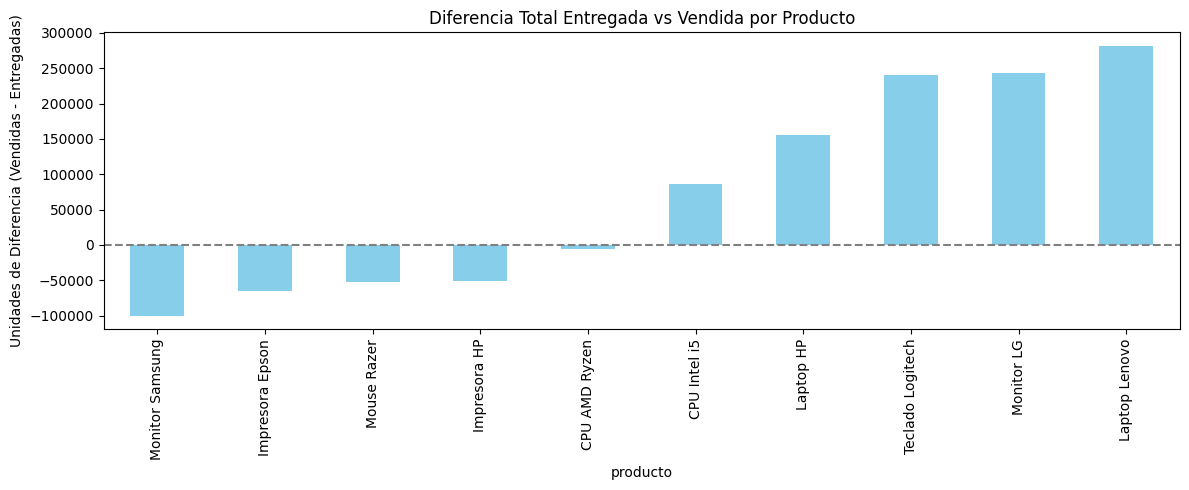

In [6]:
# Gráfico 1 con Matplotlib: Muestra la diferencia de Equipos Vendidos y Entregados

# Agrupar por producto y sumar la diferencia
resumen_diferencia = merged_df.groupby('producto')['diferencia_cantidades'].sum().sort_values()

plt.figure(figsize=(12, 5)) # Crea una nueva figura para el gráfico de tamaño 12 de ancho por 5 de alto en pulgadas.
resumen_diferencia.plot(kind='bar', color='skyblue') # Dibuja un gráfico de barras verticales (kind='bar') con los datos agrupados.

plt.axhline(0, color='gray', linestyle='--') # Línea horizontal en 0 para visualizar fácilmente positivos vs negativos

plt.title("Diferencia Total Entregada vs Vendida por Producto") #Establece el título del gráfico.
plt.ylabel("Unidades de Diferencia (Vendidas - Entregadas)") # Etiqueta del eje Y indicando claramente el significado de los valores.
plt.xticks(rotation=90) #Rota las etiquetas del eje X (nombres de productos) 90° para evitar que se encimen y mejorar la legibilidad.
plt.tight_layout() # Ajusta automáticamente el espacio entre los elementos del gráfico para que no se corten al mostrarse.
plt.show() #Muestra el gráfico en pantalla.


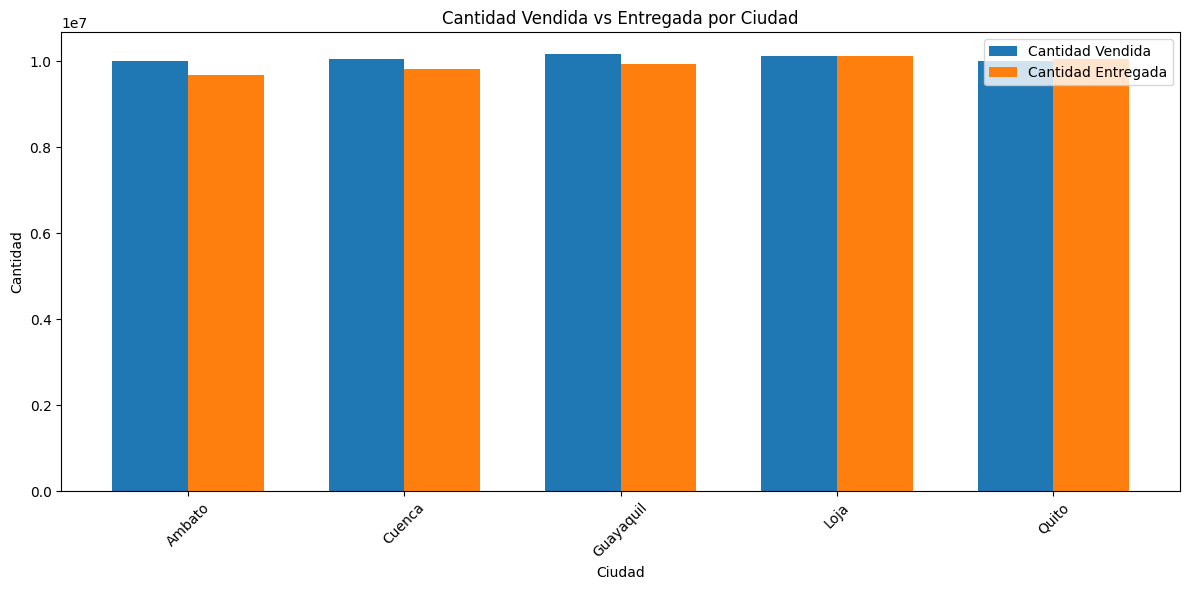

In [7]:
# Gráfico 2 con Matplotlib: Muestra la diferencia de Equipos Vendidos y Entregados

ciudad_df = merged_df.groupby("ciudad")[["cantidad", "cantidad_entregada"]].sum().reset_index() #Agrupa el DataFrame merged_df por la columna ciudad y:Suma las columnas cantidad y cantidad_entregada para cada ciudad.
#Con reset_index() convierte la ciudad en una columna nuevamente.

# Datos
labels = ciudad_df["ciudad"] #Extrae la lista de nombres de ciudades para el eje X.
cantidad_vendida = ciudad_df["cantidad"] #Obtiene el total de unidades vendidas por ciudad.
cantidad_entregada = ciudad_df["cantidad_entregada"] #Obtiene el total de unidades entregadas por ciudad.

x = np.arange(len(labels))  #  Crea un arreglo con las posiciones (índices) de cada ciudad, necesario para alinear las barras.
width = 0.35  # Define el ancho que tendrá cada barra (vendida o entregada).

# Crear gráfico
fig, ax = plt.subplots(figsize=(12, 6))# Crea la figura y el eje para el gráfico, con tamaño personalizado de 12x6 pulgadas.
bars1 = ax.bar(x - width/2, cantidad_vendida, width, label='Cantidad Vendida')# Dibuja las barras de cantidad vendida, desplazadas hacia la izquierda del centro de cada ciudad.
bars2 = ax.bar(x + width/2, cantidad_entregada, width, label='Cantidad Entregada') #Dibuja las barras de cantidad entregada, desplazadas hacia la derecha del centro.

# Personalización
ax.set_xlabel('Ciudad') #Etiqueta del eje X.
ax.set_ylabel('Cantidad') #Etiqueta del eje Y.
ax.set_title('Cantidad Vendida vs Entregada por Ciudad') #Título del gráfico.
ax.set_xticks(x) #Establece las posiciones para cada etiqueta del eje X (ciudades).
ax.set_xticklabels(labels, rotation=45)# Asigna los nombres de las ciudades a las posiciones y las rota 45° para evitar que se encimen.
ax.legend() # Agrega una leyenda para identificar qué color corresponde a cada variable (vendida vs entregada).

plt.tight_layout() # Ajusta automáticamente los márgenes para que todo se vea bien sin montarse.
plt.show() #Muestra el gráfico en pantalla.


In [8]:
# Gráfico 1 con Bokeh: Muestra la la suma de los ingresos por ciudad

ingresos_ciudad = merged_df.groupby("ciudad")["ingreso"].sum().reset_index()# Agrupa el DataFrame merged_df por la columna ciudad y suma los ingresos (ingreso) por cada ciudad.
source = ColumnDataSource(ingresos_ciudad) #Se crea un objeto fuente de datos de Bokeh (ColumnDataSource) con el DataFrame ingresos_ciudad, que será usado como entrada para generar el gráfico interactivo.

#Creación del gráfico Bokeh:Se define un gráfico de barras verticales (vbar) para mostrar ingresos por ciudad.
p = figure(x_range=ingresos_ciudad["ciudad"], title="Ingresos Totales por Ciudad", height=350)# Crea una figura Bokeh:
p.vbar(x='ciudad', top='ingreso', width=0.7, source=source) # Dibuja las barras verticales (vbar) del gráfico:
p.xaxis.major_label_orientation = "vertical" # p.xaxis.major_label_orientation = "vertical"
p.yaxis.axis_label = "Ingresos" #Establece el nombre del eje Y como Ingresos.
p.xaxis.axis_label = "Ciudad" #Establece el nombre del eje X como Ciudad.

show(p) #Muestra el gráfico en pantalla.

In [9]:
#Gráfico 2 con Bokeh:Muestra productos de mayor a menor ingresos por poducto.

ingreso_producto = merged_df.groupby("producto")["ingreso"].sum().reset_index()#Agrupa el DataFrame merged_df por la columna producto y suma los valores de la columna ingreso para cada producto.

ingreso_producto = ingreso_producto.sort_values("ingreso", ascending=False)#  Ordena el DataFrame ingreso_producto en orden descendente por ingreso.

# Crear fuente de datos
source = ColumnDataSource(ingreso_producto)# Convierte el DataFrame ingreso_producto en una fuente de datos que Bokeh puede utilizar para graficar.

#Crea una figura (figure) de Bokeh:
p = figure(y_range=ingreso_producto["producto"], #define el rango del eje Y como la lista de productos.
           title="Ingreso Total por Producto", # título del gráfico.
           width=800, height=600) #dimensiones del gráfico.

p.hbar(y="producto", right="ingreso", height=0.6, source=source, color="#0072B2") #Dibuja barras horizontales (hbar) en el gráfico

p.xaxis.axis_label = "Ingreso" #Etiqueta del eje X con el texto "Ingreso".
p.yaxis.axis_label = "Producto" #Etiqueta del eje Y con el texto "Producto".
p.y_range.range_padding = 0.1 #Añade un pequeño espacio arriba y abajo del rango del eje Y para que las barras no queden pegadas a los bordes.
p.ygrid.grid_line_color = None #Elimina las líneas de la cuadrícula del eje Y para un aspecto visual más limpio.

show(p) #Muestra el gráfico generado en pantalla



In [10]:
#Gráfico 3 con Bokeh:Muestra Tipo de Transporte utilizado.

# Agrupar tipo de transporte
data = entregas_df["tipo_transporte"].value_counts().reset_index()
data.columns = ['tipo_transporte', 'conteo']
data['angle'] = data['conteo'] / data['conteo'].sum() * 2 * pi

# Asignar colores de forma segura (aunque haya menos de 3 o más de 20 elementos)
from itertools import cycle
palette = cycle(Category20c[20])  # Reutiliza colores si hay más de 20
data['color'] = [next(palette) for _ in range(len(data))]

# Crea un gráfico Bokeh
p = figure(height=400, title="Distribución de Entregas (Donut Chart)",
           toolbar_location=None, tools="hover", tooltips="@tipo_transporte: @conteo", x_range=(-0.5, 1.0))

#Dibuja los "segmentos" del gráfico tipo donut
p.annular_wedge(x=0, y=1, inner_radius=0.2, outer_radius=0.4, #posición del centro del gráfico, define el tamaño del hueco interior (forma de donut).
                start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'), #definen el ángulo de cada cuña usando cumsum() para que se dibujen una tras otra.
                line_color="white", fill_color='color', legend_field='tipo_transporte', #cada segmento se colorea con los valores definidos antes, crea la leyenda con los nombres de transporte.
                source=ColumnDataSource(data)) # usa como datos el ColumnDataSource(data)

p.axis.visible = False #Oculta los ejes (no se necesitan en gráficos circulares).
p.grid.grid_line_color = None #Elimina las líneas de la cuadrícula de fondo para un diseño más limpio

show(p) #Muestra el gráfico generado en pantalla


In [11]:
#Abre un panel interactivo de análisis exploratorio con PyGWalker.
#Permite explorar visualmente el dataset sin escribir código adicional.
pyg.walk(merged_df)

Box(children=(HTML(value='\n<div id="ifr-pyg-0006364cf53e712ddDhsb7y3SHnmfrQ1" style="height: auto">\n    <hea…

In [12]:
#Exporta el dataset final (ya combinado y con columnas nuevas) como CSV 
merged_df.to_csv("datasets/dataset_final.csv", index=False)